# Pedestrian Travel Isochrones: Visualizing the 20-Minute Neighborhood

One concept of neighborhood is [the 20 minute walkable radius](https://linkinghub.elsevier.com/retrieve/pii/S1361920921004077) from your home. That is a network routing problem, but the spatial representation of set of locations that can be reached is often depicted by a polygon that covers the set of locations. That polygon is sometimes called an isochrone or a walkshed (or *travel shed, depending on the particular mode). For the person at the center of the isochrone, whose "neighborhood" the isochrone represents, the polygon is sometimes conceptualized as an "egohood" or "bespoke neighborhood"

In [1]:
%load_ext watermark
%watermark -a 'eli knaap' -v -d -u -p geopandas,geosnap

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/_data.py:66: UserWarning: The geosnap data storage class is provided for convenience only. The geosnap developers make no promises regarding data quality, consistency, or availability, nor are they responsible for any use/misuse of the data. The end-user is responsible for any and all analyses or applications created with the package.
  warn(


Author: eli knaap

Last updated: 2022-06-03

Python implementation: CPython
Python version       : 3.9.10
IPython version      : 8.2.0

geopandas: 0.10.2
geosnap  : 0.10.0+6.g592f2ee57e05.dirty



In [2]:
from geosnap.analyze import compute_travel_cost_adjlist, isochrone, isochrones # a singular and a plural
from geosnap.io import get_acs
from geosnap import DataStore

In [3]:
import pandana as pdna
import geopandas as gpd

In [4]:
datasets = DataStore()

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/_data.py:66: UserWarning: The geosnap data storage class is provided for convenience only. The geosnap developers make no promises regarding data quality, consistency, or availability, nor are they responsible for any use/misuse of the data. The end-user is responsible for any and all analyses or applications created with the package.
  warn(


To generate a routable network, use [pandana]() or [urbanaccess](). Alternatively, you can download one of the metropolitan-scale pedestrian networks for the U.S. from geosnap's [quilt bucket](https://open.quiltdata.com/b/spatial-ucr/tree/osm/metro_networks_8k/). The files are named for each CBSA fips code and extend 8km beyond the metro region's borders to help mitigate edge effects. Here, we'll use the quilt version from the San Diego region.

In [5]:
sd_network = pdna.Network.from_hdf5("../../geosnap_data/metro_networks_8k/41740.h5")

Generating contraction hierarchies with 10 threads.
Setting CH node vector of size 332554
Setting CH edge vector of size 522484
Range graph removed 143094 edges of 1044968
. 10% . 20% . 30% . 40% . 50% . 60% . 70% . 80% . 90% . 100%


To generate a travel isochrone, we have to specify an origin node on the network. For demonstration purposes, we can randomly select an origin from the network's `nodes_df` dataframe (or choose a pre-selected example). To get the nodes for a specific set of origins, you can use pandana's [`get_node_ids`](http://udst.github.io/pandana/network.html#pandana.network.Network.get_node_ids) function

In [6]:
from random import sample

In [7]:
random_origin = sample(sd_network.nodes_df.index.unique().tolist(),1)[0]

In [8]:
random_origin

2797748449

In [9]:
example_origin = 1985327805

[~~Nike~~](https://www.nike.com/a/how-long-does-it-take-to-walk-a-mile), er... [this study](https://jamanetwork.com/journals/jamanetworkopen/fullarticle/2752818) says that the average person walks about a mile in 20 minutes, so we can define the 20-minute neighborhood for a given household as the 1-mile walkshed from that house. To simplify the computation a little, we say that each house "exists" at it's nearest intersection

In [11]:
iso = isochrone(example_origin, sd_network, threshold=1600 ) # network is expressed in meters

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  origins.centroid.x, origins.centroid.y
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  origins.centroid.x, origins.centroid.y
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  destinations.centroid.x, destinations.centroid.y
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:45: UserWarning: Geometr

  0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
iso.explore()

We can also look at how the isochrone or bespoke neighborhood changes size and shape as we consider alternative travel thresholds. Because of the underlying network configuration, changing the threshold often results in some areas of the "neighborhood" changing more than others

In [32]:
iso_multiple = isochrone(example_origin, sd_network, threshold=[1600, 2400, 3200]  )

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  origins.centroid.x, origins.centroid.y
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  origins.centroid.x, origins.centroid.y
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  destinations.centroid.x, destinations.centroid.y
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:45: UserWarning: Geometr

  0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
iso_multiple.explore('distance', cmap='Blues_r', style_kwds={'fillOpacity':0.5})

In this example it's easy to see how the road network topology makes it easier to travel in some directions more than others. Greenspace squeezes the western portion of the 1600m (20 min) isochrone into a horizontal pattern along Calle del Cerro, but the 2400m (30 minute) isochrone opens north-south tavel again along Avienda Pico, providing access to two other pockets of development, including San Clemente High School

We can also compare the network-based isochrone to the as-the-crow-flies approximation given by a euclidean buffer. If we didn't have access to network data, this would be our best estimate of the shape and extent of the 20-minute neighborhood.

In [34]:
# convert the node into a Point and buffer it 1600m

example_point = gpd.GeoDataFrame(sd_network.nodes_df.loc[example_origin]).T
example_point.crs=4326
planar_iso = example_point.to_crs(example_point.estimate_utm_crs()).buffer(1600)

In [35]:
# plot the buffer and isochrone on the same map

m = planar_iso.to_crs(4326).explore()
iso.explore(m=m)

Obviously from this depiction, network-constrained travel is very different from a euclidean approximation. That's especially true in places with irregular networks or topography considerations (like much of California)

## Isochrones for Specified Locations

the `isochrones` function calculates several isochrones simultaneously, given a set of input destinations. For example we could look at the 20-minute neighborhood for schools in San Diego county.

In [17]:
from geosnap.io import get_nces

In [18]:
isochrones?

Signature: isochrones(origins, threshold, network, matrix=None, network_crs=4326)
Docstring:
Parameters
----------
origins : geopandas.GeoDataFrame
    a geodataframe containing the locations of origin point features
network : pandana.Network
    pandana Network instance for calculating the shortest path isochrone for each origin feature
threshold: float
    maximum travel distance to define the isochrone, measured in the same units as edges_df
    in the pandana.Network object. If the network was created with pandana this is usually meters;
    if it was created with urbanaccess this is usually travel time in minutes.
matrix: pandas dataframe (optional)
    precalculated adjacency list dataframe created with `compute_travel_adjlist`
network_crs : str, int, pyproj.CRS (optional)
    the coordinate system used to store x and y coordinates in the passed pandana network.
    If the network was created with pandana or urbanaccess this is nearly always 4326.

Returns
-------
GeoPandas.DataF

In [19]:
# same as county fips 06073 in this case, but use metro fips for consistency with network
sd = get_acs(datasets, msa_fips='41740', level='bg', years=[2019])

<AxesSubplot:>

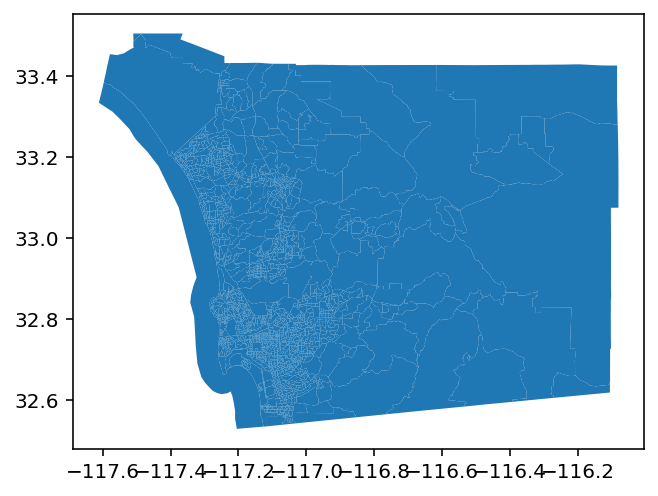

In [20]:
sd.plot()

In [21]:
schools = get_nces(datasets, dataset='schools')

In [22]:
sd_schools = schools[schools.to_crs(sd.crs).intersects(sd.unary_union)]

In [23]:
sd_schools.head()

,NCESSCH,NAME,OPSTFIPS,LSTREE,LCITY,LSTATE,LZIP,LZIP4,STFIP15,CNTY15,...,CBSATYPE15,CSA15,NMCSA15,NECTA15,NMNECTA15,CD15,SLDL15,SLDU15,geometry,year
5895,060004205341,Warner Junior/Senior High,06,30951 Highway 79,Warner Springs,CA,92086,M,06,06073,...,1,N,N,N,N,0650,071,038,POINT (-116.64292 33.27525),1516
5896,060004206527,San Jose Valley Continuation Hig,06,30951 Highway 79,Warner Springs,CA,92086,M,06,06073,...,1,N,N,N,N,0650,071,038,POINT (-116.64292 33.27525),1516
5897,060004206844,Warner Elementary,06,30951 Highway 79,Warner Springs,CA,92086,0008,06,06073,...,1,N,N,N,N,0650,071,038,POINT (-116.64292 33.27525),1516
5898,060004210387,All Tribes Charter,06,34320 Valley Center Rd.,Valley Center,CA,92082,6046,06,06073,...,1,N,N,N,N,0650,075,038,POINT (-116.95367 33.27796),1516
5899,060004212735,All Tribes Elementary Charter,06,34320 Valley Center Rd.,Valley Center,CA,92082,6046,06,06073,...,1,N,N,N,N,0650,075,038,POINT (-116.95367 33.27796),1516


<AxesSubplot:>

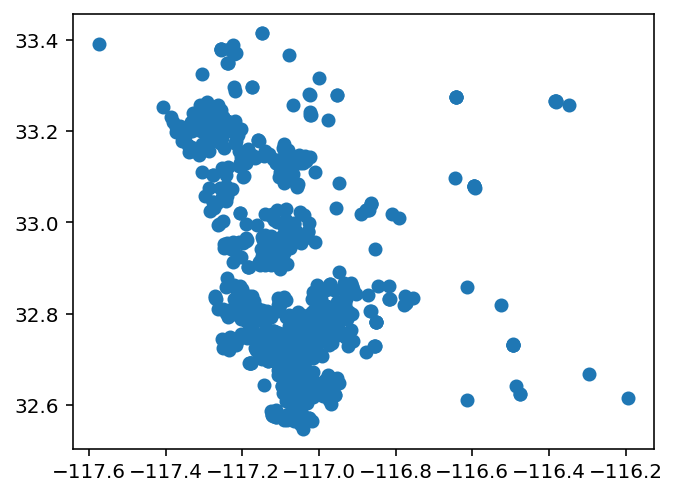

In [24]:
sd_schools.plot()

In [25]:
# randomly sample 25 schools and compute their walksheds

school_neighborhoods = isochrones(origins=sd_schools.sample(25), network=sd_network, threshold=1600,)

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  origins.centroid.x, origins.centroid.y
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  origins.centroid.x, origins.centroid.y
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  destinations.centroid.x, destinations.centroid.y
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:45: UserWarning: Geometr

  0%|          | 0/25 [00:00<?, ?it/s]

In [26]:
school_neighborhoods.explore()

## Network-Based Travel Cost Matrix

In some cases, the isochrone is less interesting than the interaction structure it implies; in social science, the isochrone is an abstract representation of the concept of distance decay. Social interactions are are more frequent among people who are close to one another, and the frequency of those interactions decreases with distance (in the isochrone case, the 'neighborhood' is a discrete container. 

Thus, in some research contexts, the isochrone itself is less useful than capturing the shortest-path network distance from a set of origins to a set of destinations (this can later be used as a spatial weights matrix or an input to [accessibility](https://pysal.org/access) analysis). The [`pandana`]() library is fantastic at finding shortest 

Unlike the `isochrone` and `isochrones` functions which compute the shortest network path from each origin *to every destination node in the network*, the `compute_travel_cost_adjlist` function only computes paths between the specified origins and destinations, reducing the computational burden for large networks

(Under the hood, the isochrone functions use `compute travel_cost_adjlist` function to compute the path between the set of origins and *all* destination nodes in the network (i.e. subsetting only the origins, not the destinations). For repeated queries, it's possible to compute and store the dense the all-pairs shortest-cost travel matrix ahead of time. Note this is happening at the *intersection* level, so for a metro the size of san diego, this is a *massive* problem, even with pandana's speed... In that case, you can pass the precomputed matrix directly to the `isochrones` function

In [27]:
compute_travel_cost_adjlist?

Signature:
compute_travel_cost_adjlist(
    origins,
    destinations,
    network,
    index_orig=None,
    index_dest=None,
)
Docstring:
Generate travel cost adjacency list.

Parameters
----------
origins : geopandas.GeoDataFrame
    a geodataframe containing the locations of origin features
destinations : geopandas.GeoDataFrame
    a geodataframe containing the locations of destination features
network : pandana.Network
    pandana Network instance for calculating the shortest path between origins and destinations
index_orig : str, optional
    Column on the origins dataframe the defines unique units to be used as the origins id
    on the resulting dataframe. If not set, each unit will be assigned the index from its
    associated node_id on the network
index_dest : str, optional
    Column on the destinations dataframe the defines unique units to be used as the destinations id
    on the resulting dataframe. If not set, each unit will be assigned the index from its
    associated 


We can trim the problem down by passing a geodataframe of origins/destinations like blockgroups or tracts to make the problem a bit smaller ($n_{blockgroups}^2$ instead of $n_{intersections}^2$)

In [28]:
sd_adj = compute_travel_cost_adjlist(sd, sd, sd_network, index_dest='geoid', index_orig='geoid')

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  origins.centroid.x, origins.centroid.y
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:42: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  origins.centroid.x, origins.centroid.y
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:45: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  destinations.centroid.x, destinations.centroid.y
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/analyze/network.py:45: UserWarning: Geometr

  0%|          | 0/1795 [00:00<?, ?it/s]

The `sd_adj` dataframe is an adjacency list representation of the shortest-path cost between each block-group centroid in San Diego county

In [29]:
sd_adj

,cost,destination,origin
0,0.000,060730001001,060730001001
1,987.566,060730001002,060730001001
2,1221.944,060730002011,060730001001
3,2208.548,060730002021,060730001001
4,1465.891,060730002022,060730001001
...,...,...,...
1790,40466.678,060730220002,060739901000
1791,23566.234,060730221001,060739901000
1792,21198.103,060730221002,060739901000
1793,18928.505,060730221003,060739901000
